# Basics of TensorFlow 2.0

Overview:
1. The very basics
2. Classification theory
3. Regression theory

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

from sklearn import datasets
from sklearn.utils import Bunch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

## Section 1. The very basics

In [2]:
print(tf.__version__)

2.1.0


In [3]:
print(tf.test.gpu_device_name())

In [4]:
# 0D tensor
d0 = tf.ones((1, ))

# 1D tensor
d1 = tf.ones((2,))

# 2D tensor
d2 = tf.ones((2, 2))

# 3D tensor
d3 = tf.ones((2, 2, 2))
print(d3)

tf.Tensor(
[[[1. 1.]
  [1. 1.]]

 [[1. 1.]
  [1. 1.]]], shape=(2, 2, 2), dtype=float32)


In [5]:
# Define a 2x3 constant
a = tf.constant(3, shape=(2, 3))
print(a)

tf.Tensor(
[[3 3 3]
 [3 3 3]], shape=(2, 3), dtype=int32)


In [6]:
# Define a 2X2 constant
b = tf.constant((1, 2, 3, 4), shape=(2, 2))
print(b)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [7]:
print(tf.zeros((2, 2)))

tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)


In [8]:
print(tf.zeros_like(a))

tf.Tensor(
[[0 0 0]
 [0 0 0]], shape=(2, 3), dtype=int32)


In [9]:
print(tf.fill((3, 3), 7))

tf.Tensor(
[[7 7 7]
 [7 7 7]
 [7 7 7]], shape=(3, 3), dtype=int32)


Note that certain TensorFlow operations, such as `tf.multiply` are overloaded, which allows us to use the simpler `a0 * c` expression instead.

In [10]:
# Define variables
a0 = tf.Variable(range(1, 7), dtype=tf.float32)

# Define a constant
c = tf.constant(2, tf.float32)

# Compute their product
c0 = tf.multiply(a0, c)
print(c0)

c1 = a0 * c
print(c1)
print(tf.equal(c0, c1))

tf.Tensor([ 2.  4.  6.  8. 10. 12.], shape=(6,), dtype=float32)
tf.Tensor([ 2.  4.  6.  8. 10. 12.], shape=(6,), dtype=float32)
tf.Tensor([ True  True  True  True  True  True], shape=(6,), dtype=bool)


In [11]:
print(a0)

# Convert a0 to a numpy array
a1 = a0.numpy()
print(a1)

<tf.Variable 'Variable:0' shape=(6,) dtype=float32, numpy=array([1., 2., 3., 4., 5., 6.], dtype=float32)>
[1. 2. 3. 4. 5. 6.]


## Section 2. Classification theory

### Quick EDA

In [12]:
breast_cancer: Bunch = datasets.load_breast_cancer()
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [13]:
print(f"Data shape: {breast_cancer.data.shape}, data type: {type(breast_cancer.data).__name__!r}")
print(f"Target shape: {breast_cancer.target.shape}, data type: {type(breast_cancer.target).__name__!r}")

Data shape: (569, 30), data type: 'ndarray'
Target shape: (569,), data type: 'ndarray'


In [14]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [15]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [16]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Build a model

We will first split our data into test and training sets. This lets us see how the model will perform on unseen data, and therefore its ability to do generalization.

We specify the `random_state` parameter for replication purposes only.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=.3, random_state=21)
N, D = X_train.shape

Next, we want to scale our data because the output is a linear combination of the input. That is, we don't want an input to have a very large range. say 1 million, and another input to have a very small range like, say 0.001. If this happens, then the weight will be too sensitive with respect to the input having the large range and too insensitive to the input having the small range.

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [19]:
model = Sequential([Input(shape=(D, )), Dense(1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

# Model evaluation
print(f"Train socre: {model.evaluate(X_train, y_train)}")
print(f"Test score: {model.evaluate(X_test, y_test)}")

398/398 [==============================] - 0s 23us/sample - loss: 0.0874 - accuracy: 0.9824
Train socre: [0.08742437919779639, 0.98241204]
171/171 [==============================] - 0s 41us/sample - loss: 0.0908 - accuracy: 0.9649
Test score: [0.09082883182499144, 0.9649123]


## Visualize the evaluation metrics of the model

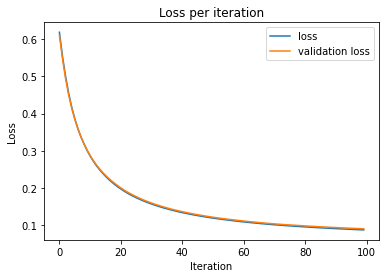

In [20]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.legend()
plt.title('Loss per iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

We can use this plot above to determine whether we need more or less epochs, or change any other hyperparameters. 

Generally, we are looking for a smooth curve like this. So, we see a nice steady decrease in the last iteration as expected.

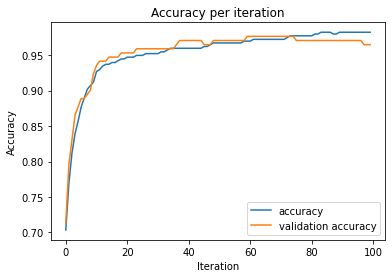

In [21]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.title('Accuracy per iteration')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.show()

Again, we see a steady increase at each iteration as we expected.

## Section 3. Regression theory
### Learning rate scheduling

### Loss function
$$ MSE = \frac{1}{N} \sum^N_{i=1} (y_i - \hat{y}_i)^2 $$

### Why no accuracy?
When using regression, we turn onto a continuous space. Meaning, that we argue that 1.001 is a very good prediction if the target was 1. In such a case, the accuracy measure would state that this prediction is false because 1 != 1.001, even if we perfectly understand that the prediction was very good. Instead, we will later use the $R^2$.

In [22]:
reqs = []
with open('data/reqs.txt', mode='r') as f:
    for i, line in enumerate(f.readlines()):
        if i > 1:
            reqs.append('=='.join(line.split()))

FileNotFoundError: [Errno 2] No such file or directory: 'data/reqs.txt'

In [ ]:
with open('requirements.txt', mode='w') as f:
    for req in reqs:
        f.write(f"{req}\n")